In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the dataset into python environment

In [2]:
df = pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



# 2. Make ‘PassengerId’ as the index column

In [4]:
df.set_index('PassengerId',inplace=True)


In [5]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S



# 3. Check the basic details of the dataset

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from here we can see Pclass and fare std deviation is more comparatively thus outliers could be high

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

from here we can see age and cabin have huge no of missing value compared to Embarked

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

since name has 891 unique obervation it can be dropped as part of feature engineering which would be useful for model prediction in future

In [10]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

here Cabin has 70% of data missing which is greater than 20% so we can drop that feature

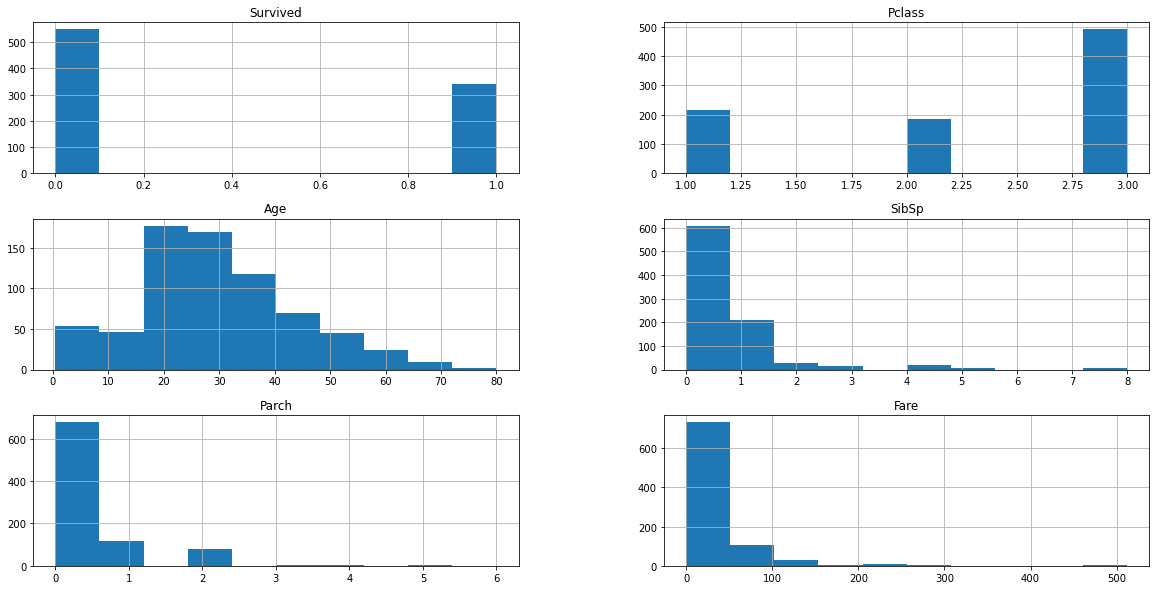

In [11]:
f_numeric = df.select_dtypes(include=['float','int64'])
f_numeric.hist(figsize=(20,10))
plt.show()

here Age is right skewed distribution and thus we can use median to fill in the missing values

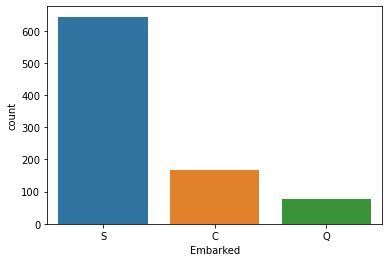

In [12]:
sns.countplot(x='Embarked',data=df)
plt.show()


since Embarked has 2 missing values and is a categorical feature so we can use mode to fill the missing values

In [13]:
df.drop('Cabin',axis=1,inplace=True)

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


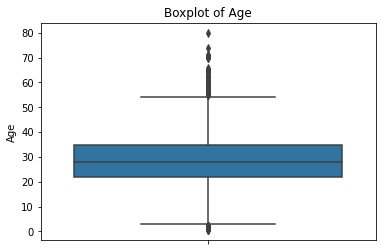

In [18]:
sns.boxplot(y='Age',data=df)
plt.title('Boxplot of Age')
plt.show()

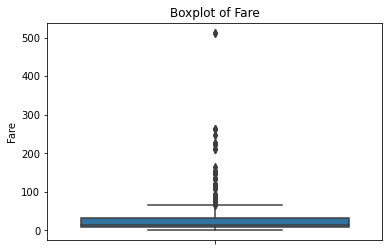

In [19]:
sns.boxplot(y='Fare',data=df)
plt.title('Boxplot of Fare')
plt.show()

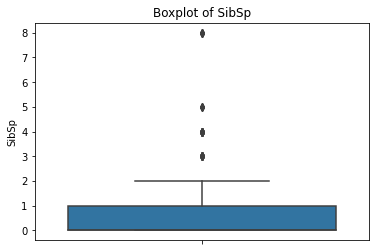

In [20]:
sns.boxplot(y='SibSp',data=df)
plt.title('Boxplot of SibSp')
plt.show()

removing Age outliers
    

In [21]:
Q1 = np.percentile(df['Age'],25,interpolation='midpoint')
Q2 = np.percentile(df['Age'],50,interpolation='midpoint')
Q3 = np.percentile(df['Age'],75,interpolation = 'midpoint')
print('Q1,Q2,Q3 = ', Q1, Q2 , Q3)
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q2 + 1.5*IQR
print('low_lim,up_lim = ',low_lim , up_lim)
   
    
        
    

Q1,Q2,Q3 =  22.0 28.0 35.0
low_lim,up_lim =  2.5 47.5


In [22]:
outlier =[]
for x in df['Age']:
    if(x>up_lim or x<low_lim):
        outlier.append(x)
        

In [23]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 49.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 54.0,
 51.0,
 55.5,
 51.0,
 1.0,
 61.0,
 1.0,
 56.0,
 50.0,
 1.0,
 58.0,
 2.0,
 51.0,
 59.0,
 54.0,
 62.0,
 50.0,
 52.0,
 58.0,
 63.0,
 65.0,
 2.0,
 50.0,
 0.92,
 54.0,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 51.0,
 50.0,
 64.0,
 52.0,
 49.0,
 65.0,
 50.0,
 48.0,
 48.0,
 56.0,
 0.75,
 2.0,
 50.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 54.0,
 50.0,
 2.0,
 50.0,
 64.0,
 62.0,
 48.0,
 62.0,
 53.0,
 54.0,
 60.0,
 52.0,
 49.0,
 49.0,
 61.0,
 57.0,
 80.0,
 51.0,
 2.0,
 0.75,
 48.0,
 56.0,
 58.0,
 50.0,
 70.0,
 60.0,
 60.0,
 52.0,
 49.0,
 48.0,
 52.0,
 50.0,
 48.0,
 70.0,
 48.0,
 0.67,
 51.0,
 48.0,
 57.0,
 54.0,
 1.0,
 49.0,
 0.42,
 52.0,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 51.0,
 48.0,
 56.0]

In [24]:
ind1 = df['Age']>up_lim
print(ind1)

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Age, Length: 891, dtype: bool


In [25]:
df.loc[ind1].index

Int64Index([  7,  12,  16,  34,  53,  55,  95,  97, 117, 125, 151, 153, 156,
            171, 175, 178, 196, 223, 233, 250, 253, 260, 263, 269, 276, 281,
            300, 318, 327, 367, 407, 435, 439, 450, 454, 457, 459, 461, 464,
            468, 483, 484, 488, 493, 494, 497, 514, 527, 545, 546, 556, 557,
            571, 572, 583, 588, 592, 598, 600, 626, 627, 631, 632, 646, 648,
            660, 661, 673, 685, 695, 696, 699, 713, 715, 724, 737, 746, 755,
            766, 772, 773, 775, 797, 821, 830, 852, 858, 863, 880],
           dtype='int64', name='PassengerId')

In [26]:
df.drop([  7,  12,  16,  34,  53,  55,  95,  97, 117, 125, 151, 153, 156,
            171, 175, 178, 196, 223, 233, 250, 253, 260, 263, 269, 276, 281,
            300, 318, 327, 367, 407, 435, 439, 450, 454, 457, 459, 461, 464,
            468, 483, 484, 488, 493, 494, 497, 514, 527, 545, 546, 556, 557,
            571, 572, 583, 588, 592, 598, 600, 626, 627, 631, 632, 646, 648,
            660, 661, 673, 685, 695, 696, 699, 713, 715, 724, 737, 746, 755,
            766, 772, 773, 775, 797, 821, 830, 852, 858, 863, 880],inplace=True)

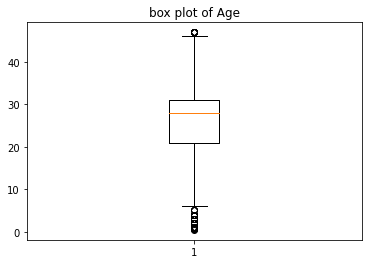

In [27]:
plt.boxplot(df['Age'])
plt.title('box plot of Age')
plt.show()

Removing Fare outliers


In [28]:
Q1 = np.percentile(df['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(df['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(df['Fare'],75,interpolation = 'midpoint')
print('Q1,Q2,Q3 = ', Q1, Q2 , Q3)
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q2 + 1.5*IQR
print('low_lim,up_lim = ',round(low_lim,2) , round(up_lim,2))
   

Q1,Q2,Q3 =  7.8958 13.0 29.125
low_lim,up_lim =  -23.95 44.84


In [29]:
outlier =[]
for x in df['Fare']:
    if(x>up_lim or x<low_lim):
        outlier.append(round(x,2))

In [30]:
outlier

[71.28,
 53.1,
 263.0,
 146.52,
 82.17,
 52.0,
 46.9,
 80.0,
 83.47,
 46.9,
 73.5,
 56.5,
 47.1,
 263.0,
 61.17,
 63.36,
 77.29,
 52.0,
 247.52,
 73.5,
 53.1,
 79.2,
 66.6,
 69.55,
 55.0,
 56.5,
 69.55,
 50.0,
 69.55,
 113.28,
 76.29,
 90.0,
 83.47,
 90.0,
 52.55,
 79.2,
 86.5,
 512.33,
 135.63,
 78.85,
 91.08,
 151.55,
 151.55,
 110.88,
 108.9,
 56.93,
 83.16,
 262.38,
 164.87,
 134.5,
 69.55,
 135.63,
 57.98,
 153.46,
 133.65,
 66.6,
 134.5,
 263.0,
 55.0,
 69.3,
 55.44,
 135.63,
 82.17,
 211.5,
 227.53,
 52.0,
 73.5,
 46.9,
 120.0,
 113.28,
 90.0,
 120.0,
 81.86,
 51.86,
 52.0,
 46.9,
 91.08,
 90.0,
 151.55,
 86.5,
 108.9,
 56.5,
 93.5,
 57.98,
 221.78,
 106.42,
 49.5,
 71.0,
 110.88,
 227.53,
 79.65,
 55.9,
 110.88,
 79.65,
 153.46,
 65.0,
 52.55,
 77.96,
 69.3,
 56.5,
 73.5,
 73.5,
 52.0,
 52.0,
 46.9,
 512.33,
 76.73,
 46.9,
 211.34,
 57.0,
 56.5,
 227.53,
 151.55,
 49.5,
 227.53,
 53.1,
 211.34,
 512.33,
 78.85,
 262.38,
 53.1,
 86.5,
 120.0,
 211.34,
 57.0,
 79.2,
 69.55,
 120.

In [31]:
ind1 = df['Fare']>up_lim
print(ind1)

PassengerId
1      False
2       True
3      False
4       True
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Fare, Length: 802, dtype: bool


In [32]:
df.loc[ind1].index.values

array([  2,   4,  28,  32,  35,  36,  60,  62,  63,  72,  73,  75,  84,
        89,  93,  98, 103, 111, 119, 121, 138, 140, 152, 160, 167, 170,
       181, 186, 202, 216, 219, 225, 231, 246, 249, 257, 258, 259, 270,
       291, 292, 298, 306, 307, 308, 310, 311, 312, 319, 320, 325, 326,
       330, 333, 335, 337, 338, 342, 357, 370, 371, 374, 376, 378, 381,
       384, 386, 387, 391, 394, 413, 436, 446, 458, 476, 481, 485, 487,
       499, 505, 506, 510, 521, 524, 528, 538, 540, 541, 551, 558, 559,
       578, 582, 586, 610, 616, 622, 628, 642, 644, 656, 666, 670, 672,
       679, 680, 682, 684, 690, 691, 693, 701, 709, 711, 717, 725, 731,
       738, 742, 743, 749, 760, 764, 780, 782, 790, 793, 803, 810, 827,
       836, 839, 847, 850, 857, 864, 868, 872], dtype=int64)

In [33]:
df.drop([  2,   4,  28,  32,  35,  36,  60,  62,  63,  72,  73,  75,  84,
        89,  93,  98, 103, 111, 119, 121, 138, 140, 152, 160, 167, 170,
       181, 186, 202, 216, 219, 225, 231, 246, 249, 257, 258, 259, 270,
       291, 292, 298, 306, 307, 308, 310, 311, 312, 319, 320, 325, 326,
       330, 333, 335, 337, 338, 342, 357, 370, 371, 374, 376, 378, 381,
       384, 386, 387, 391, 394, 413, 436, 446, 458, 476, 481, 485, 487,
       499, 505, 506, 510, 521, 524, 528, 538, 540, 541, 551, 558, 559,
       578, 582, 586, 610, 616, 622, 628, 642, 644, 656, 666, 670, 672,
       679, 680, 682, 684, 690, 691, 693, 701, 709, 711, 717, 725, 731,
       738, 742, 743, 749, 760, 764, 780, 782, 790, 793, 803, 810, 827,
       836, 839, 847, 850, 857, 864, 868, 872],inplace=True)

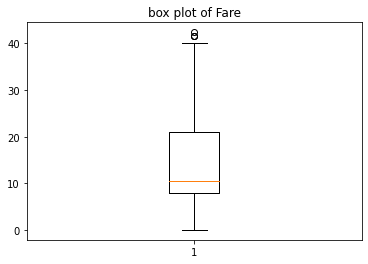

In [34]:
plt.boxplot(df['Fare'])
plt.title('box plot of Fare')
plt.show()

Removing Sibsp outliers

In [35]:
Q1 = np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(df['SibSp'],75,interpolation = 'midpoint')
print('Q1,Q2,Q3 = ', Q1, Q2 , Q3)
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q2 + 1.5*IQR
print('low_lim,up_lim = ',round(low_lim,2) , round(up_lim,2))

Q1,Q2,Q3 =  0.0 0.0 1.0
low_lim,up_lim =  -1.5 1.5


In [36]:
outlier =[]
for x in df['SibSp']:
    if(x>up_lim or x<low_lim):
        outlier.append(round(x,2))

In [37]:
outlier

[3,
 4,
 3,
 2,
 2,
 4,
 3,
 4,
 2,
 3,
 2,
 4,
 2,
 4,
 4,
 3,
 4,
 2,
 3,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 2]

In [38]:
ind1 = df['SibSp']>up_lim
print(ind1)

PassengerId
1      False
3      False
5      False
6      False
8       True
       ...  
887    False
888    False
889    False
890    False
891    False
Name: SibSp, Length: 664, dtype: bool


In [39]:
df.loc[ind1].index.values

array([  8,  17,  25,  39,  49,  51,  64,  69,  70,  86, 105, 120, 148,
       165, 172, 177, 183, 184, 230, 234, 262, 267, 279, 302, 331, 334,
       375, 393, 410, 437, 438, 449, 470, 486, 530, 542, 543, 566, 601,
       619, 635, 643, 645, 687, 727, 788, 814, 820, 825, 851, 861],
      dtype=int64)

In [40]:
df.drop([  8,  17,  25,  39,  49,  51,  64,  69,  70,  86, 105, 120, 148,
       165, 172, 177, 183, 184, 230, 234, 262, 267, 279, 302, 331, 334,
       375, 393, 410, 437, 438, 449, 470, 486, 530, 542, 543, 566, 601,
       619, 635, 643, 645, 687, 727, 788, 814, 820, 825, 851, 861],inplace=True)

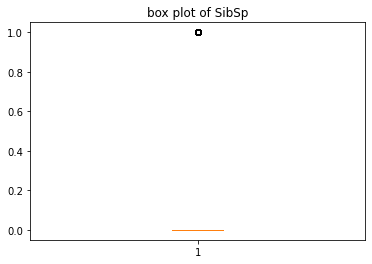

In [41]:
plt.boxplot(df['SibSp'])
plt.title('box plot of SibSp')
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [42]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  613 non-null    int64  
 1   Pclass    613 non-null    int64  
 2   Name      613 non-null    object 
 3   Sex       613 non-null    object 
 4   Age       613 non-null    float64
 5   SibSp     613 non-null    int64  
 6   Parch     613 non-null    int64  
 7   Ticket    613 non-null    object 
 8   Fare      613 non-null    float64
 9   Embarked  613 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 52.7+ KB


In [44]:
df.nunique()

Survived      2
Pclass        3
Name        613
Sex           2
Age          61
SibSp         2
Parch         6
Ticket      541
Fare        166
Embarked      3
dtype: int64

In [45]:
# here target dependent is survived and we drop name column because no of obervation is equal to unique values for name
df.drop('Name',axis=1,inplace=True)

In [46]:
#One hot Encoding
df = pd.get_dummies(df)

In [47]:
y = df['Survived']
X = df.drop('Survived',axis=1)

In [48]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110564,Ticket_111320,Ticket_111369,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W/C 14208,Embarked_C,Embarked_Q,Embarked_S
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,2.590538,26.996330,0.213703,0.275693,13.744554,0.301794,0.698206,0.001631,0.001631,0.001631,...,0.001631,0.001631,0.001631,0.003263,0.001631,0.001631,0.001631,0.153344,0.107667,0.738989
std,0.636865,8.948244,0.410254,0.736987,8.647198,0.459411,0.459411,0.040390,0.040390,0.040390,...,0.040390,0.040390,0.040390,0.057073,0.040390,0.040390,0.040390,0.360613,0.310213,0.439545
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.795800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,9.500000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,31.000000,0.000000,0.000000,16.700000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,47.000000,1.000000,5.000000,42.400000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110564,Ticket_111320,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W/C 14208,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
from sklearn import preprocessing

In [51]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X = pd.DataFrame(X)

In [52]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.795269,0.570552,0.213703,0.055139,0.324164,0.301794,0.698206,0.001631,0.001631,0.001631,...,0.001631,0.001631,0.001631,0.003263,0.001631,0.001631,0.001631,0.153344,0.107667,0.738989
std,0.318432,0.192105,0.410254,0.147397,0.203943,0.459411,0.459411,0.040390,0.040390,0.040390,...,0.040390,0.040390,0.040390,0.057073,0.040390,0.040390,0.040390,0.360613,0.310213,0.439545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.463289,0.000000,0.000000,0.183863,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.592100,0.000000,0.000000,0.224057,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.656505,0.000000,0.000000,0.393868,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


MinMax scaling is done